In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import pickle
from tests.clock_times import TimeClocker
%matplotlib notebook

In [8]:
fast_file_name = "output_50.pkl"
normal_file_name = "output_0.pkl"
with open(f"./clock_times/{normal_file_name}", "rb") as f_normal, open(f"./clock_times/{fast_file_name}", "rb") as f_fast:
        f = pickle.load(f_fast)
        n = pickle.load(f_normal)

In [9]:
# Make data.
def make_surface_data(data):
    X = data.child_iter
    Y = data.parent_iter
    X, Y = np.meshgrid(X, Y)
    Z = data.time_array
    return X, Y, Z

X_n, Y_n, Z_n = make_surface_data(n)
X_f, Y_f, Z_f = make_surface_data(f)
assert (X_n == X_f).all(), "Normal and fast X axes are not the same"
assert (Y_n == Y_f).all(), "Normal and fast Y axes are not the same"


<IPython.core.display.Javascript object>


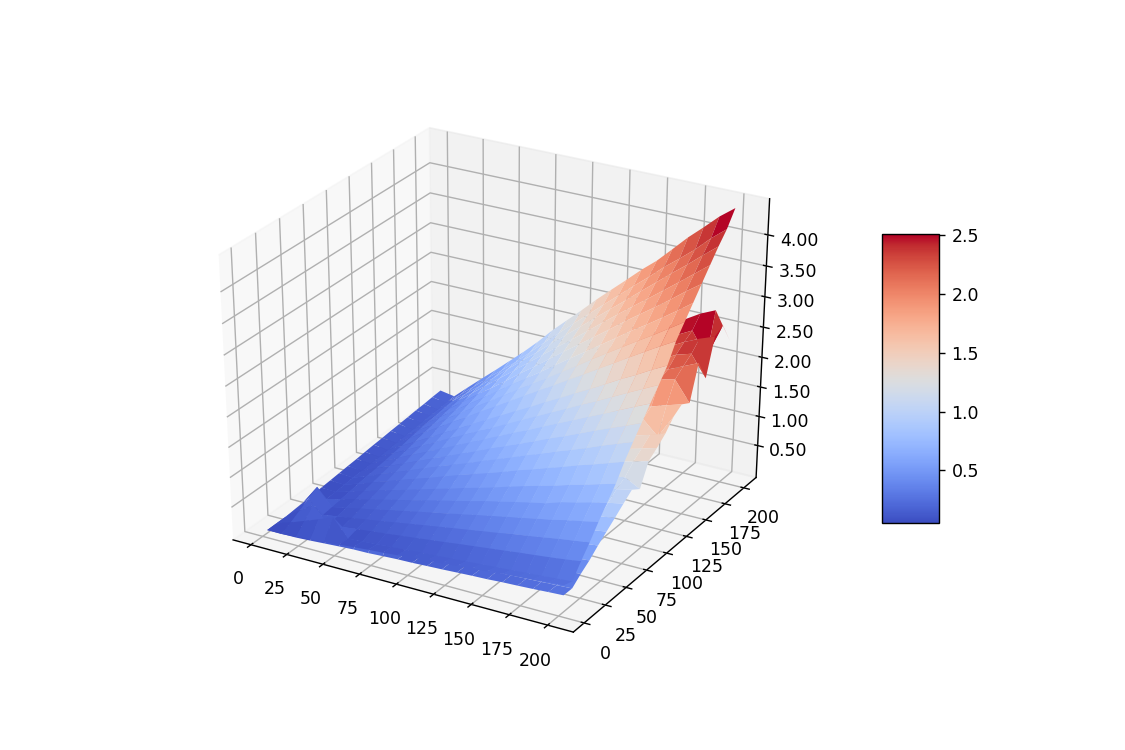

In [10]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface.
surf = ax.plot_surface(X_n, Y_n, Z_n, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)

surf = ax.plot_surface(X_f, Y_f, Z_f, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)

# Customize the z axis.
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

pass


<IPython.core.display.Javascript object>


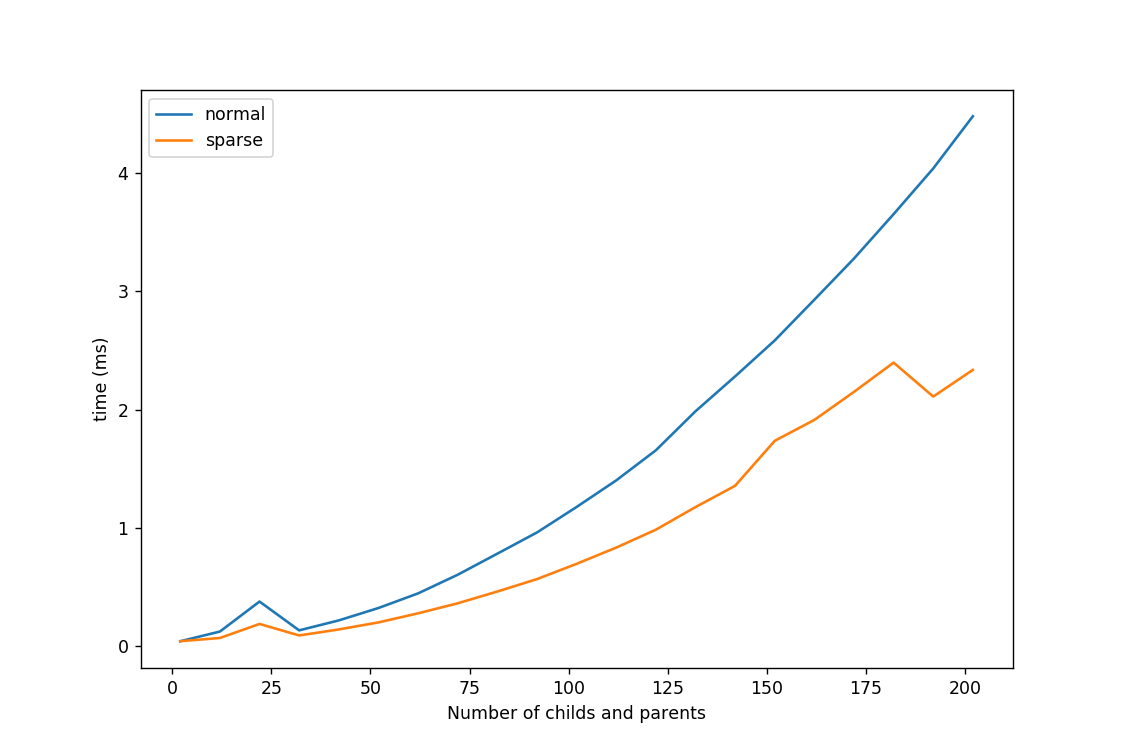

In [11]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

ax.plot(X_n.diagonal(0), Z_n.diagonal(0), label="normal")
ax.plot(X_f.diagonal(0), Z_f.diagonal(0), label="sparse")
ax.legend()
ax.set_xlabel("Number of childs and parents")
ax.set_ylabel("time (ms)")

pass


<IPython.core.display.Javascript object>


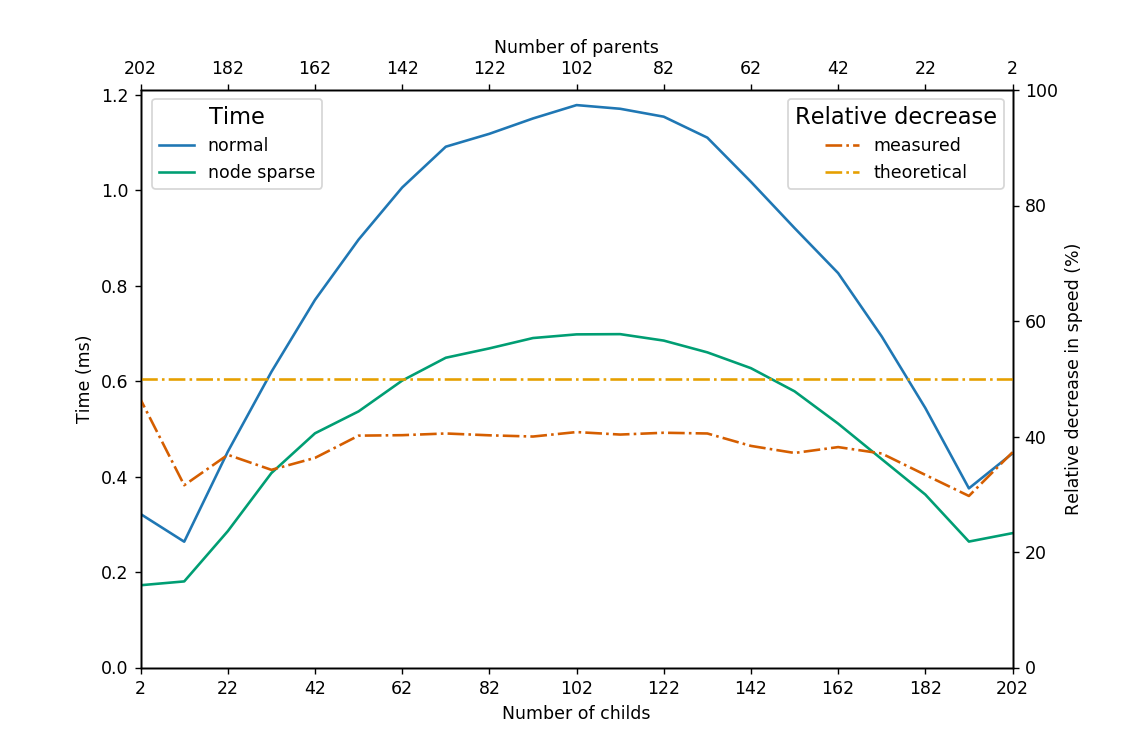

In [17]:
fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(111)

X_ = np.fliplr(X_n).diagonal(0)

# from matplotlib import rc
# rc('text', usetex=True)

ax1.plot(X_, np.fliplr(Z_n).diagonal(0), label="normal")
ax1.plot(X_, np.fliplr(Z_f).diagonal(0), label="node sparse", color="#009E73")
xticks = np.asarray(range(2, 220, 20))
ax1.set_xticks(xticks)
ax1.set_xlim(2, 202)
ax1.set_xlabel("Number of childs")
lg = ax1.legend(title="Time", bbox_to_anchor=(0.218, 1))
lg.get_title().set_fontsize(13)
ax1.set_ylabel("Time (ms)")
ax1.set_ylim(0, 1.21)

ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())

ax2.set_xticks(xticks)
ax2.set_xticklabels(xticks[::-1])
ax2.set_xlabel("Number of parents")

ax3 = ax1.twinx()
ax3.set_ylabel("Relative decrease in speed (%)")
ratio = np.abs((np.fliplr(Z_f).diagonal(0) / np.fliplr(Z_n).diagonal(0) - 1)) * 100
ax3.set_ylim(0, 100)
ax3.plot(X_, ratio, color="#D55E00", linestyle="-.", label="measured")
ax3.plot(X_, np.full(ratio.shape, 50), color="#E69F00", linestyle="-.", label="theoretical")
lg = ax3.legend(title="Relative decrease", bbox_to_anchor=(1, 1))
lg.get_title().set_fontsize(13)

pass
